# Travel Review Rating

## Usecase & Description

-- Details would be added here

#### 1. Install & Import Required Libraries

##### Install Required Python Libraries if not exists

In [58]:
!pip install faker pandas numpy matplotlib seaborn scikit-learn ucimlrepo scipy IPython --quiet

##### Importing libraries

In [125]:
## Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
from ucimlrepo import fetch_ucirepo 
import warnings
import scipy.stats as stats
from faker import Faker
import os
import random
import pandas as pd
from datetime import datetime
from scipy.stats import skew, norm 
warnings.filterwarnings('ignore')


#### 2. Data Aquisition from UCI - Repository

##### Fetch Data from UCI ML Repository regarding Travel Reviews

In [94]:

print(f""" Output Timestamp: {datetime.now()} \n""")

# fetch dataset 
travel_review_ratings = fetch_ucirepo(id=485) 
  
# data (as pandas dataframes) 
X = travel_review_ratings.data.features 
y = travel_review_ratings.data.targets 

# variable information 
display(travel_review_ratings.variables) 


 Output Timestamp: 2025-06-19 07:37:34.401963 



,name,role,type,demographic,description,units,missing_values
0,userid,ID,Categorical,None,None,None,no
1,churches,Feature,Continuous,None,None,None,no
2,resorts,Feature,Continuous,None,None,None,no
3,beaches,Feature,Integer,None,None,None,no
4,parks,Feature,Continuous,None,None,None,no
5,theatres,Feature,Continuous,None,None,None,no
6,museums,Feature,Continuous,None,None,None,no
7,malls,Feature,Continuous,None,None,None,no
8,zoos,Feature,Continuous,None,None,None,no
9,restaurants,Feature,Integer,None,None,None,no


##### Display the Data from Dataframe

In [95]:
print(f""" Output Timestamp: {datetime.now()} \n""")
## Convert the UCI ML Repo dataset to a pandas DataFrame
df_travel_review_ratings = travel_review_ratings.data.original
display(df_travel_review_ratings)

 Output Timestamp: 2025-06-19 07:37:40.543070 



,userid,churches,resorts,beaches,parks,theatres,museums,malls,zoos,restaurants,...,art galleries,dance clubs,swimming pools,gyms,bakeries,beauty & spas,cafes,view points,monuments,gardens
0,User 1,0.00,0.00,3.63,3.65,5.00,2.92,5.00,2.35,2.33,...,1.74,0.59,0.50,0.00,0.50,0.00,0.00,0.0,0.0,0.00
1,User 2,0.00,0.00,3.63,3.65,5.00,2.92,5.00,2.64,2.33,...,1.74,0.59,0.50,0.00,0.50,0.00,0.00,0.0,0.0,0.00
2,User 3,0.00,0.00,3.63,3.63,5.00,2.92,5.00,2.64,2.33,...,1.74,0.59,0.50,0.00,0.50,0.00,0.00,0.0,0.0,0.00
3,User 4,0.00,0.50,3.63,3.63,5.00,2.92,5.00,2.35,2.33,...,1.74,0.59,0.50,0.00,0.50,0.00,0.00,0.0,0.0,0.00
4,User 5,0.00,0.00,3.63,3.63,5.00,2.92,5.00,2.64,2.33,...,1.74,0.59,0.50,0.00,0.50,0.00,0.00,0.0,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5451,User 5452,0.91,5.00,4.00,2.79,2.77,2.57,2.43,1.09,1.77,...,5.00,0.66,0.65,0.66,0.69,5.00,1.05,5.0,5.0,1.56
5452,User 5453,0.93,5.00,4.02,2.79,2.78,2.57,1.77,1.07,1.76,...,0.89,0.65,0.64,0.65,1.59,1.62,1.06,5.0,5.0,1.09
5453,User 5454,0.94,5.00,4.03,2.80,2.78,2.57,1.75,1.05,1.75,...,0.87,0.65,0.63,0.64,0.74,5.00,1.07,5.0,5.0,1.11
5454,User 5455,0.95,4.05,4.05,2.81,2.79,2.44,1.76,1.03,1.74,...,5.00,0.64,0.63,0.64,0.75,5.00,1.08,5.0,5.0,1.12


#### 3. Generate User Demographics Data using Python Faker Library if the Data doesn't exist Locally

##### Check if the User Demographics Data/File exist locally. If Not, Generate Data else read the file into DataFrame

In [96]:


print(f""" Output Timestamp: {datetime.now()} \n""")
# Check if the file exists
if not os.path.exists('all_users.csv'):

    fake = Faker()
    num_users = 6000
    countries = ['US', 'UK', 'IN']
    genders = ['Male', 'Female']

    data = []
    for i in range(1, num_users + 1):
        user = {
            'userid': f'User {i}',
            'age': random.randint(18, 80),
            'gender': random.choice(genders),
            'country': random.choice(countries)
        }
        data.append(user)

    df_fake_users = pd.DataFrame(data)
    df_fake_users.to_csv('all_users.csv', index=False)
    print("all_users.csv generated.")
else:
    print("all_users.csv already exists.")
    df_user_demographics = pd.read_csv('all_users.csv', sep=',')
    display(df_user_demographics)

 Output Timestamp: 2025-06-19 07:37:45.492224 

all_users.csv already exists.


,userid,age,gender,country
0,User 1,52,Male,IN
1,User 2,66,Female,US
2,User 3,46,Female,UK
3,User 4,70,Female,UK
4,User 5,28,Male,UK
...,...,...,...,...
5995,User 5996,31,Male,UK
5996,User 5997,78,Male,IN
5997,User 5998,30,Female,IN
5998,User 5999,19,Male,UK


#### 4. Combine User Demographics Data with Travel Review Ratings

In [97]:
print(f""" Output Timestamp: {datetime.now()} \n""")
df_user_travel_reviews = pd.merge(df_user_demographics, df_travel_review_ratings, on='userid', how='inner')
display(df_user_travel_reviews.head())

 Output Timestamp: 2025-06-19 07:37:51.028416 



,userid,age,gender,country,churches,resorts,beaches,parks,theatres,museums,...,art galleries,dance clubs,swimming pools,gyms,bakeries,beauty & spas,cafes,view points,monuments,gardens
0,User 1,52,Male,IN,0.0,0.0,3.63,3.65,5.0,2.92,...,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0
1,User 2,66,Female,US,0.0,0.0,3.63,3.65,5.0,2.92,...,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0
2,User 3,46,Female,UK,0.0,0.0,3.63,3.63,5.0,2.92,...,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0
3,User 4,70,Female,UK,0.0,0.5,3.63,3.63,5.0,2.92,...,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0
4,User 5,28,Male,UK,0.0,0.0,3.63,3.63,5.0,2.92,...,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0


##### Categorize the Age in DataFrame in Youth, Adult & Senior

In [98]:
print(f""" Output Timestamp: {datetime.now()} \n""")
# Define a function to categorize age
def categorize_age(age):
    if age < 18:
        return 'Youth'
    elif age < 60:
        return 'Adult'
    else:
        return 'Senior'

# Apply the function to create a new column
df_user_travel_reviews['age_group'] = df_user_travel_reviews['age'].apply(categorize_age)
display(df_user_travel_reviews.head())


 Output Timestamp: 2025-06-19 07:37:55.753494 



,userid,age,gender,country,churches,resorts,beaches,parks,theatres,museums,...,dance clubs,swimming pools,gyms,bakeries,beauty & spas,cafes,view points,monuments,gardens,age_group
0,User 1,52,Male,IN,0.0,0.0,3.63,3.65,5.0,2.92,...,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,Adult
1,User 2,66,Female,US,0.0,0.0,3.63,3.65,5.0,2.92,...,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,Senior
2,User 3,46,Female,UK,0.0,0.0,3.63,3.63,5.0,2.92,...,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,Adult
3,User 4,70,Female,UK,0.0,0.5,3.63,3.63,5.0,2.92,...,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,Senior
4,User 5,28,Male,UK,0.0,0.0,3.63,3.63,5.0,2.92,...,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,Adult


##### Add Columns as Average Rating by Each Category

In [99]:
print(f""" Output Timestamp: {datetime.now()} \n""")
# Define column groups
natural_space_cols = ['parks', 'beaches', 'gardens', 'view points', 'monuments']
entertainment_cols = ['theatres', 'dance clubs', 'pubs/bars', 'zoos', 'resorts', 'swimming pools','malls'
                      ,'hotels/other lodgings',
                      'gyms','beauty & spas']
food_space_cols = ['restaurants', 'burger/pizza shops', 'juice bars', 'cafes', 'bakeries']
art_related_cols = ['museums', 'art galleries', 'churches','local services']

# Convert relevant columns to numeric (safely)
for col in natural_space_cols + entertainment_cols + art_related_cols:
    df_user_travel_reviews[col] = pd.to_numeric(df_user_travel_reviews[col], errors='coerce')

# Function to calculate mean ignoring 0 and NaN
def custom_mean(series):
    valid = series[(series != 0) & (~series.isna())]
    return valid.mean() if not valid.empty else np.nan

# Apply custom mean per row
df_user_travel_reviews['avg_natural_space'] = df_user_travel_reviews[natural_space_cols].apply(custom_mean, axis=1)
df_user_travel_reviews['avg_entertainment'] = df_user_travel_reviews[entertainment_cols].apply(custom_mean, axis=1)
df_user_travel_reviews['avg_art_related'] = df_user_travel_reviews[art_related_cols].apply(custom_mean, axis=1)
df_user_travel_reviews['avg_food_spaces'] = df_user_travel_reviews[food_space_cols].apply(custom_mean, axis=1)

display(df_user_travel_reviews.head())

 Output Timestamp: 2025-06-19 07:38:09.085967 



,userid,age,gender,country,churches,resorts,beaches,parks,theatres,museums,...,beauty & spas,cafes,view points,monuments,gardens,age_group,avg_natural_space,avg_entertainment,avg_art_related,avg_food_spaces
0,User 1,52,Male,IN,0.0,0.0,3.63,3.65,5.0,2.92,...,0.0,0.0,0.0,0.0,0.0,Adult,3.64,2.540000,2.12,1.56
1,User 2,66,Female,US,0.0,0.0,3.63,3.65,5.0,2.92,...,0.0,0.0,0.0,0.0,0.0,Senior,3.64,2.582857,2.12,1.56
2,User 3,46,Female,UK,0.0,0.0,3.63,3.63,5.0,2.92,...,0.0,0.0,0.0,0.0,0.0,Adult,3.63,2.581429,2.12,1.56
3,User 4,70,Female,UK,0.0,0.5,3.63,3.63,5.0,2.92,...,0.0,0.0,0.0,0.0,0.0,Senior,3.63,2.285000,2.13,1.56
4,User 5,28,Male,UK,0.0,0.0,3.63,3.63,5.0,2.92,...,0.0,0.0,0.0,0.0,0.0,Adult,3.63,2.581429,2.12,1.56


#### 5. Exploratory Data Analysis

##### Perform the descriptive Statistics on the Dataframe

In [100]:
print(f""" Output Timestamp: {datetime.now()} \n""")
## Perform Descriptive Statistics on the DataFrame
## We can see 
display(df_user_travel_reviews.describe(include='all'))

 Output Timestamp: 2025-06-19 07:38:20.637277 



,userid,age,gender,country,churches,resorts,beaches,parks,theatres,museums,...,beauty & spas,cafes,view points,monuments,gardens,age_group,avg_natural_space,avg_entertainment,avg_art_related,avg_food_spaces
count,5456,5456.000000,5456,5456,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.00000,...,5456.000000,5456.000000,5456.000000,5456.000000,5455.000000,5456,5456.000000,5456.000000,5456.00000,5456.000000
unique,5456,NaN,2,3,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN
top,User 1,NaN,Male,US,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Adult,NaN,NaN,NaN,NaN
freq,1,NaN,2777,1843,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,3673,NaN,NaN,NaN,NaN
mean,NaN,48.802786,NaN,NaN,1.455720,2.319707,2.489331,2.796886,2.958941,2.89349,...,1.000071,0.965838,1.750537,1.531453,1.560755,NaN,2.082796,2.127986,2.30015,2.006793
std,NaN,18.045994,NaN,NaN,0.827604,1.421438,1.247815,1.309159,1.339056,1.28240,...,1.193891,0.929853,1.598734,1.316889,1.171756,NaN,0.814292,0.424924,0.54220,0.639361
min,NaN,18.000000,NaN,NaN,0.000000,0.000000,0.000000,0.830000,1.120000,1.11000,...,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.716000,1.232000,1.12500,0.732000
25%,NaN,33.000000,NaN,NaN,0.920000,1.360000,1.540000,1.730000,1.770000,1.79000,...,0.540000,0.570000,0.740000,0.790000,0.880000,NaN,1.443000,1.807944,1.86000,1.604750
50%,NaN,49.000000,NaN,NaN,1.340000,1.905000,2.060000,2.460000,2.670000,2.68000,...,0.690000,0.760000,1.030000,1.070000,1.290000,NaN,1.953000,2.097000,2.33500,1.916000
75%,NaN,64.000000,NaN,NaN,1.810000,2.682500,2.740000,4.092500,4.312500,3.84000,...,0.860000,1.000000,2.070000,1.560000,1.660000,NaN,2.614500,2.420000,2.61500,2.395250


##### Data Cleaning based on Null / Duplicate values and then check the descriptive statistics

 Output Timestamp: 2025-06-19 07:38:25.885323 

Missing values per column:
 local services        1
burger/pizza shops    1
gardens               1
dtype: int64

Data types:
 userid                    object
age                        int64
gender                    object
country                   object
churches                 float64
resorts                  float64
beaches                  float64
parks                    float64
theatres                 float64
museums                  float64
malls                    float64
zoos                     float64
restaurants              float64
pubs/bars                float64
local services           float64
burger/pizza shops       float64
hotels/other lodgings    float64
juice bars               float64
art galleries            float64
dance clubs              float64
swimming pools           float64
gyms                     float64
bakeries                 float64
beauty & spas            float64
cafes                    float64


,userid,age,gender,country,churches,resorts,beaches,parks,theatres,museums,...,beauty & spas,cafes,view points,monuments,gardens,age_group,avg_natural_space,avg_entertainment,avg_art_related,avg_food_spaces
count,5454,5454.000000,5454,5454,5454.000000,5454.000000,5454.000000,5454.000000,5454.000000,5454.000000,...,5454.000000,5454.000000,5454.000000,5454.000000,5454.000000,5454,5454.000000,5454.000000,5454.000000,5454.000000
unique,5454,NaN,2,3,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN
top,User 1,NaN,Male,US,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Adult,NaN,NaN,NaN,NaN
freq,1,NaN,2776,1842,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,3671,NaN,NaN,NaN,NaN
mean,NaN,48.805281,NaN,NaN,1.455746,2.320048,2.489059,2.797103,2.958904,2.893423,...,0.999626,0.965275,1.749345,1.531051,1.560570,NaN,2.082383,2.127937,2.299925,2.006445
std,NaN,18.048009,NaN,NaN,0.827732,1.421576,1.247503,1.309188,1.338785,1.282101,...,1.193129,0.928326,1.597816,1.316180,1.171784,NaN,0.814149,0.424715,0.542143,0.638812
min,NaN,18.000000,NaN,NaN,0.000000,0.000000,0.000000,0.830000,1.120000,1.110000,...,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.716000,1.232000,1.125000,0.732000
25%,NaN,33.000000,NaN,NaN,0.920000,1.360000,1.540000,1.730000,1.770000,1.790000,...,0.540000,0.570000,0.740000,0.790000,0.880000,NaN,1.442333,1.808000,1.860000,1.604250
50%,NaN,49.000000,NaN,NaN,1.340000,1.910000,2.060000,2.460000,2.670000,2.680000,...,0.690000,0.760000,1.030000,1.070000,1.290000,NaN,1.952000,2.097000,2.335000,1.916000
75%,NaN,64.000000,NaN,NaN,1.810000,2.687500,2.740000,4.097500,4.310000,3.837500,...,0.860000,1.000000,2.070000,1.560000,1.660000,NaN,2.614000,2.420000,2.615000,2.394750



Value counts for gender:
gender
Male      2776
Female    2678
Name: count, dtype: int64

Value counts for country:
country
US    1842
IN    1813
UK    1799
Name: count, dtype: int64


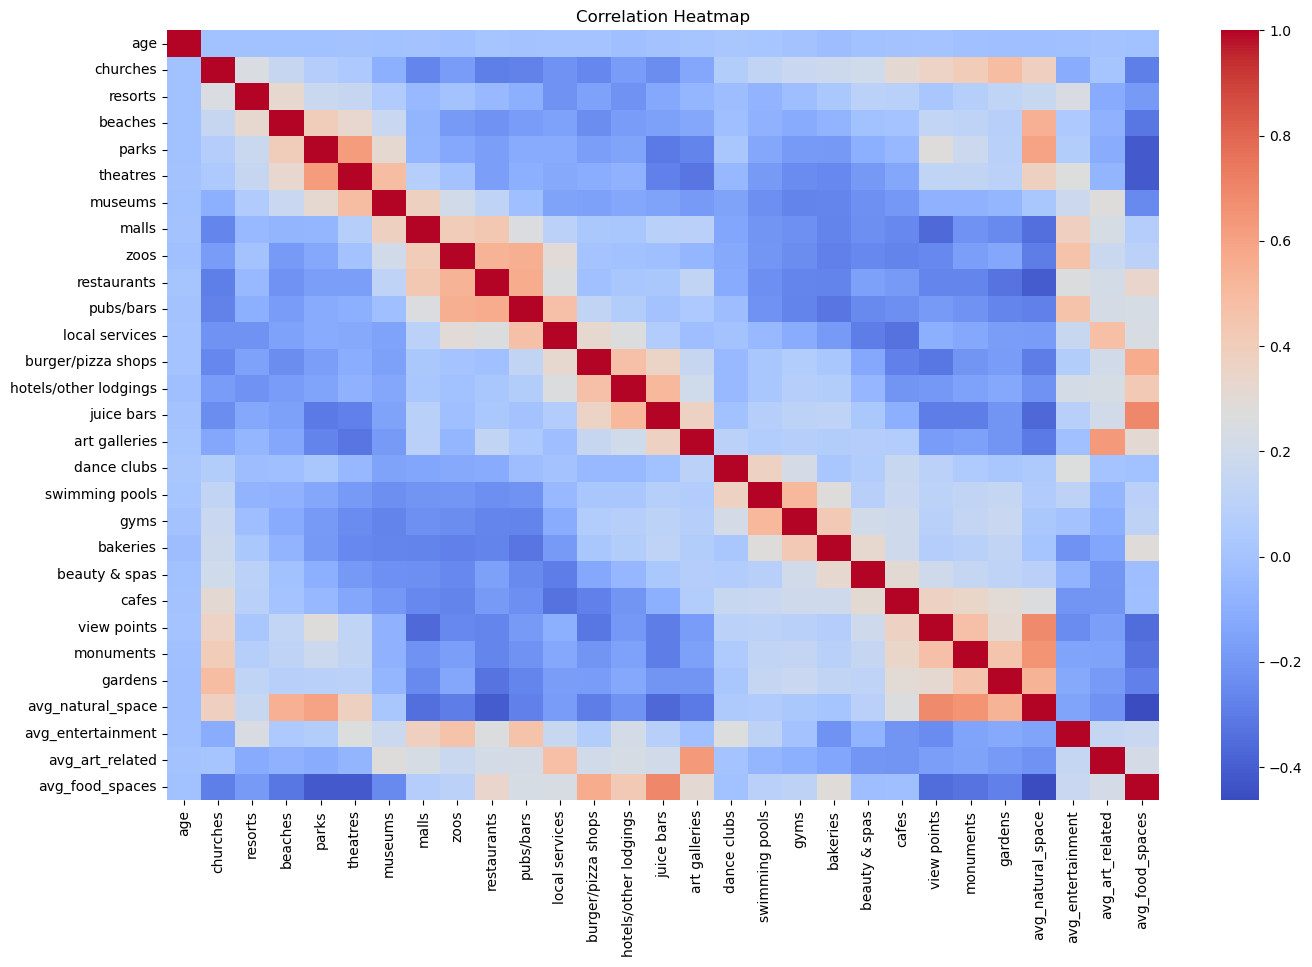

In [101]:
print(f""" Output Timestamp: {datetime.now()} \n""")
# Exploratory Data Analysis (EDA) and Cleanup for df_user_travel_reviews

# 1. Check for missing values
missing_counts = df_user_travel_reviews.isnull().sum()
print("Missing values per column:\n", missing_counts[missing_counts > 0])

# 2. Drop rows with missing values (if any)
df_user_travel_reviews_clean = df_user_travel_reviews.dropna().reset_index(drop=True)

# 3. Check data types
print("\nData types:\n", df_user_travel_reviews_clean.dtypes)

# 4. Check for duplicates
duplicates = df_user_travel_reviews_clean.duplicated().sum()
print(f"\nNumber of duplicate rows: {duplicates}")

# 5. Drop duplicates if any
df_user_travel_reviews_clean = df_user_travel_reviews_clean.drop_duplicates().reset_index(drop=True)

# 6. Basic statistics
display(df_user_travel_reviews_clean.describe(include='all'))

# 7. Value counts for categorical columns
for col in ['gender', 'country']:
    print(f"\nValue counts for {col}:")
    print(df_user_travel_reviews_clean[col].value_counts())

# 8. Correlation heatmap for numeric columns
plt.figure(figsize=(16, 10))
sns.heatmap(df_user_travel_reviews_clean.select_dtypes(include='number').corr(), annot=False, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# 9. Update the main dataframe variable for further analysis
df_user_travel_reviews = df_user_travel_reviews_clean

#### Display the Distribution of data and Some Inferences on it

 Output Timestamp: 2025-06-19 08:01:03.640349 



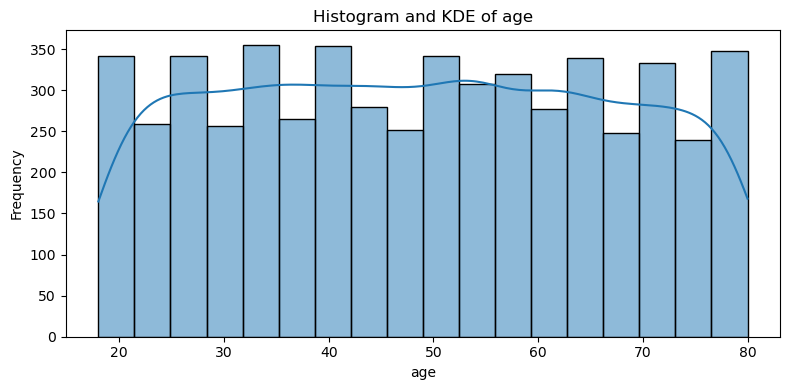

Inference for age:
Skewness: 0.02 → The distribution is approximately symmetric.

- Mean vs Median: 48.81 vs 49.00 → Fairly symmetric central tendency.
- IQR (Interquartile Range): 31.00
- Number of Outliers (1.5*IQR rule): 0


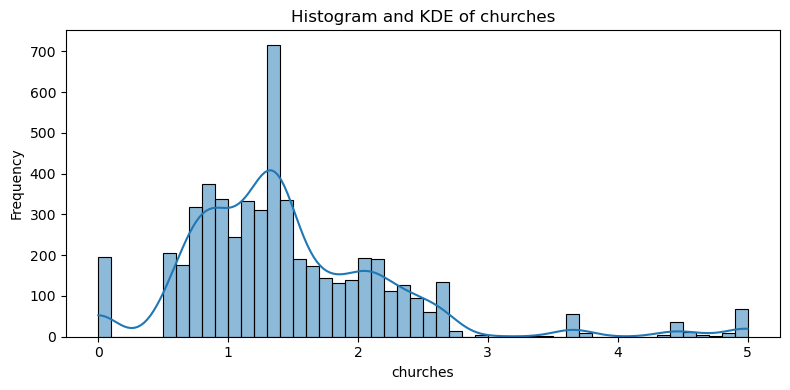

Inference for churches:
Skewness: 1.67 → The distribution is highly right-skewed (positively skewed). Most values are concentrated on the left.

- Mean vs Median: 1.46 vs 1.34 → Skewed central tendency.
- IQR (Interquartile Range): 0.89
- Number of Outliers (1.5*IQR rule): 197


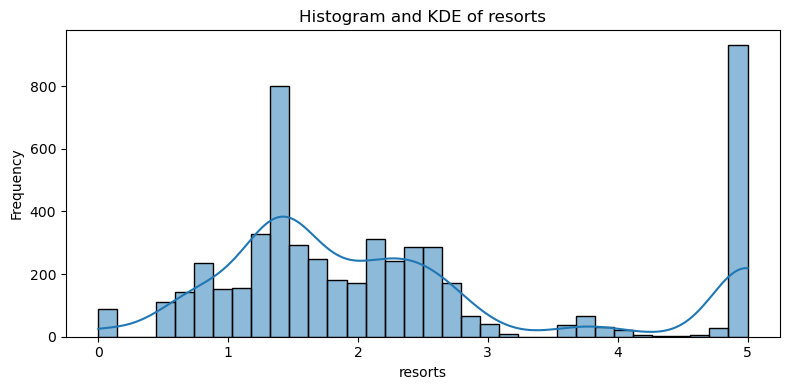

Inference for resorts:
Skewness: 0.88 → The distribution is moderately right-skewed (positively skewed).

- Mean vs Median: 2.32 vs 1.91 → Skewed central tendency.
- IQR (Interquartile Range): 1.33
- Number of Outliers (1.5*IQR rule): 966


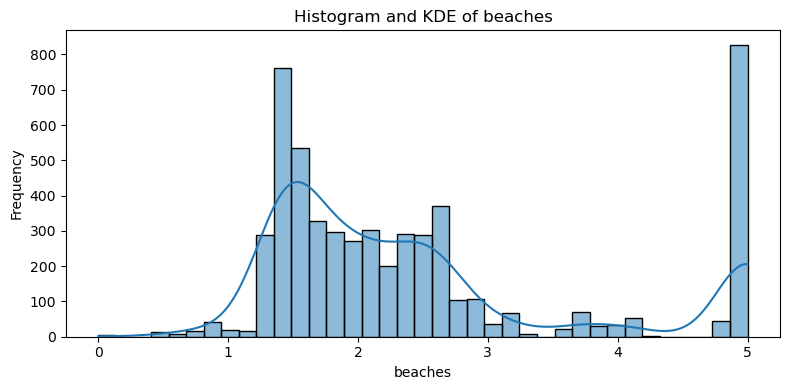

Inference for beaches:
Skewness: 1.09 → The distribution is highly right-skewed (positively skewed). Most values are concentrated on the left.

- Mean vs Median: 2.49 vs 2.06 → Skewed central tendency.
- IQR (Interquartile Range): 1.20
- Number of Outliers (1.5*IQR rule): 872


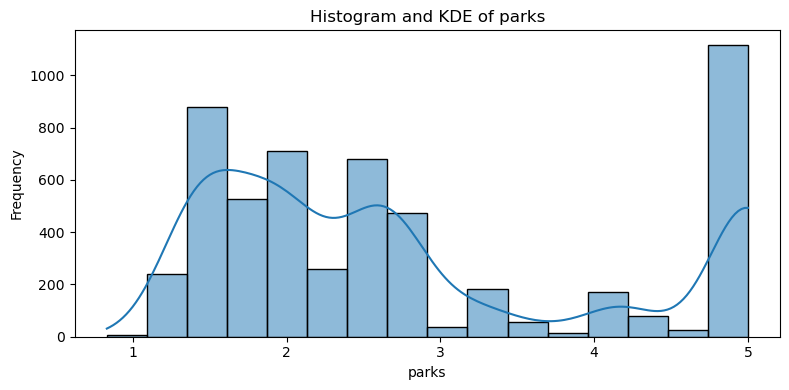

Inference for parks:
Skewness: 0.71 → The distribution is moderately right-skewed (positively skewed).

- Mean vs Median: 2.80 vs 2.46 → Skewed central tendency.
- IQR (Interquartile Range): 2.37
- Number of Outliers (1.5*IQR rule): 0


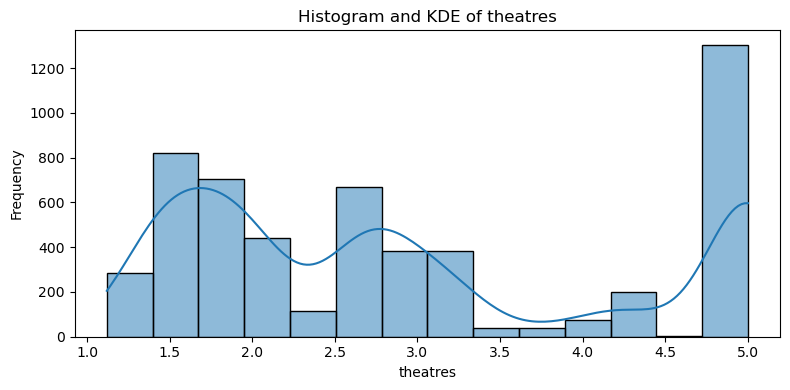

Inference for theatres:
Skewness: 0.49 → The distribution is approximately symmetric.

- Mean vs Median: 2.96 vs 2.67 → Skewed central tendency.
- IQR (Interquartile Range): 2.54
- Number of Outliers (1.5*IQR rule): 0


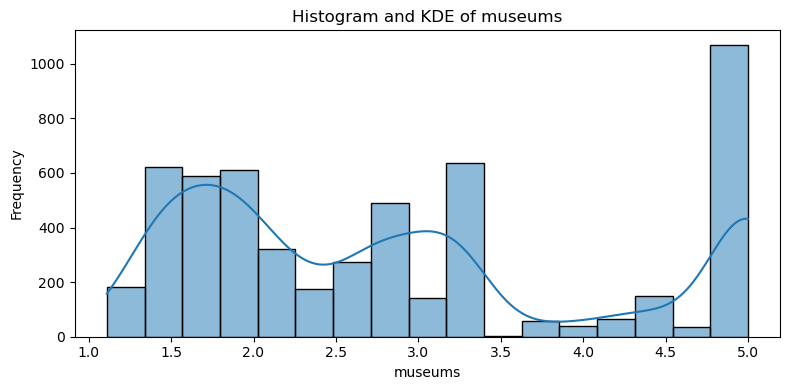

Inference for museums:
Skewness: 0.56 → The distribution is moderately right-skewed (positively skewed).

- Mean vs Median: 2.89 vs 2.68 → Skewed central tendency.
- IQR (Interquartile Range): 2.05
- Number of Outliers (1.5*IQR rule): 0


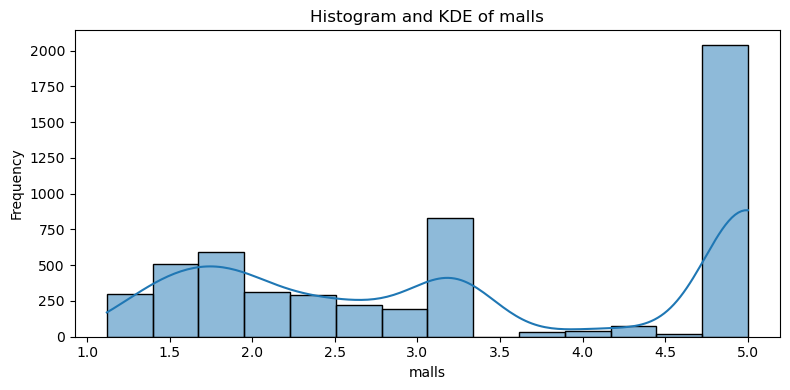

Inference for malls:
Skewness: 0.02 → The distribution is approximately symmetric.

- Mean vs Median: 3.35 vs 3.23 → Fairly symmetric central tendency.
- IQR (Interquartile Range): 3.07
- Number of Outliers (1.5*IQR rule): 0


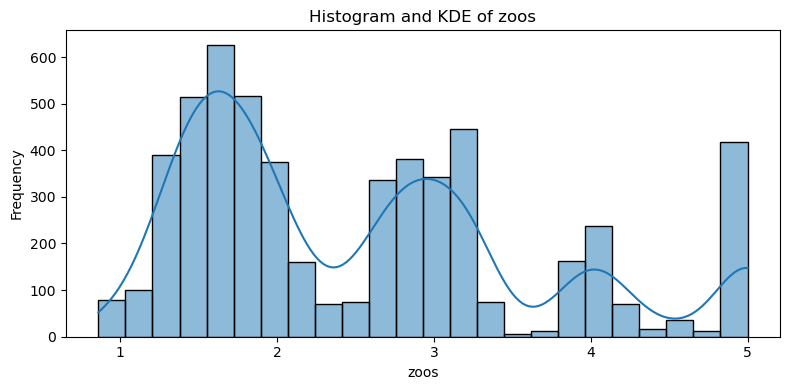

Inference for zoos:
Skewness: 0.77 → The distribution is moderately right-skewed (positively skewed).

- Mean vs Median: 2.54 vs 2.17 → Skewed central tendency.
- IQR (Interquartile Range): 1.57
- Number of Outliers (1.5*IQR rule): 0


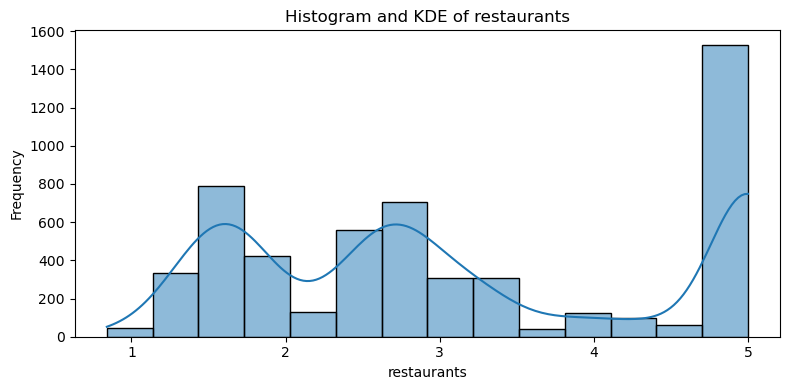

Inference for restaurants:
Skewness: 0.27 → The distribution is approximately symmetric.

- Mean vs Median: 3.13 vs 2.80 → Skewed central tendency.
- IQR (Interquartile Range): 3.20
- Number of Outliers (1.5*IQR rule): 0


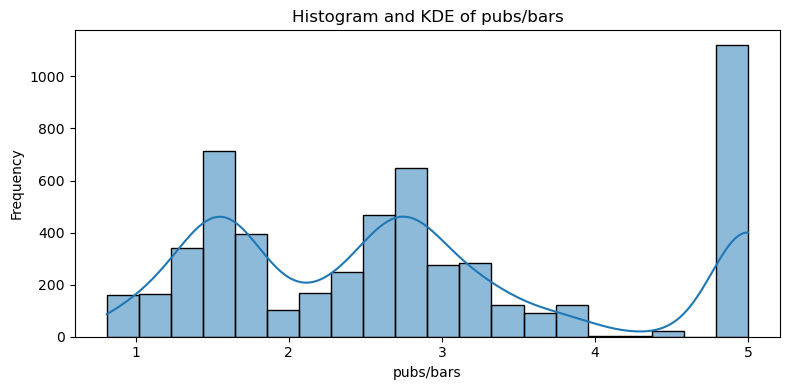

Inference for pubs/bars:
Skewness: 0.52 → The distribution is moderately right-skewed (positively skewed).

- Mean vs Median: 2.83 vs 2.68 → Skewed central tendency.
- IQR (Interquartile Range): 1.89
- Number of Outliers (1.5*IQR rule): 0


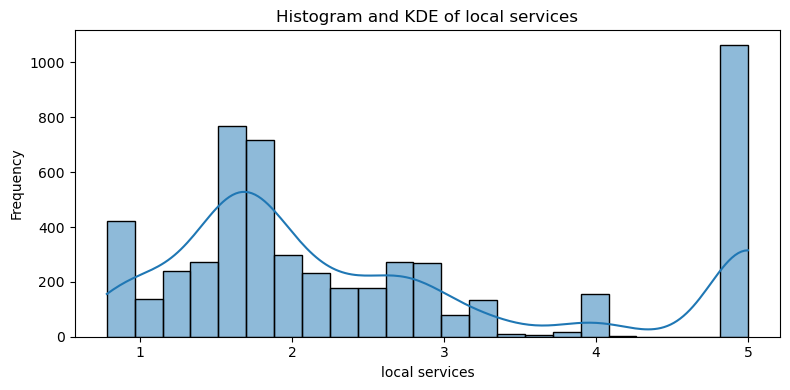

Inference for local services:
Skewness: 0.82 → The distribution is moderately right-skewed (positively skewed).

- Mean vs Median: 2.55 vs 2.00 → Skewed central tendency.
- IQR (Interquartile Range): 1.64
- Number of Outliers (1.5*IQR rule): 0


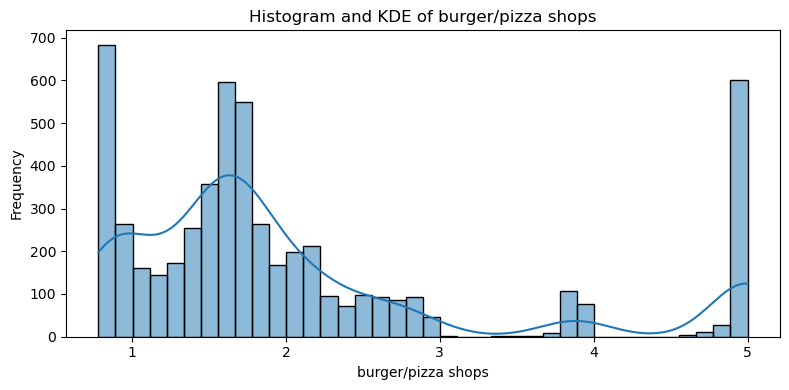

Inference for burger/pizza shops:
Skewness: 1.39 → The distribution is highly right-skewed (positively skewed). Most values are concentrated on the left.

- Mean vs Median: 2.08 vs 1.69 → Skewed central tendency.
- IQR (Interquartile Range): 1.00
- Number of Outliers (1.5*IQR rule): 825


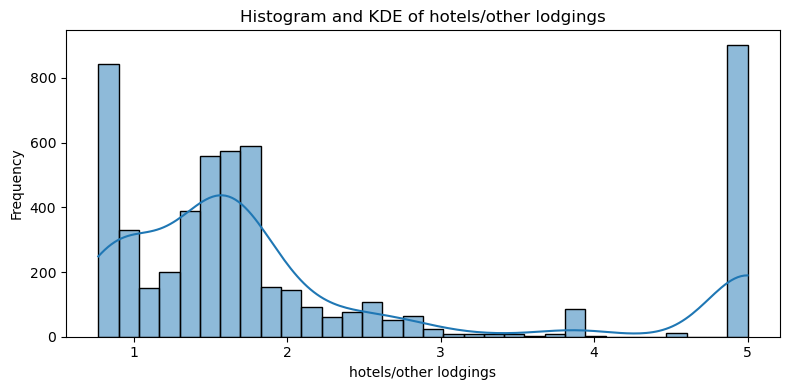

Inference for hotels/other lodgings:
Skewness: 1.26 → The distribution is highly right-skewed (positively skewed). Most values are concentrated on the left.

- Mean vs Median: 2.13 vs 1.61 → Skewed central tendency.
- IQR (Interquartile Range): 1.17
- Number of Outliers (1.5*IQR rule): 915


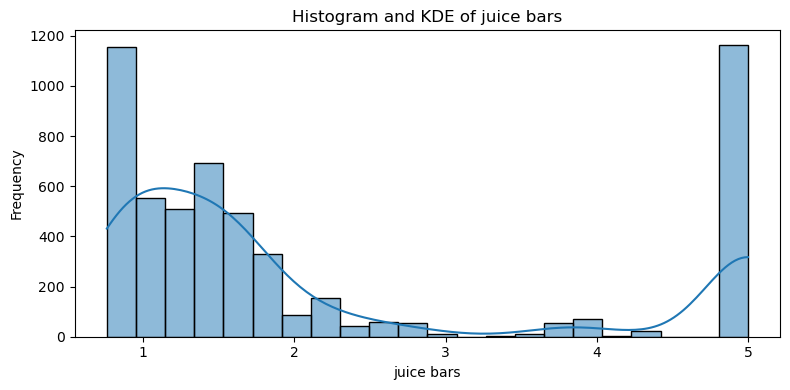

Inference for juice bars:
Skewness: 1.03 → The distribution is highly right-skewed (positively skewed). Most values are concentrated on the left.

- Mean vs Median: 2.19 vs 1.49 → Skewed central tendency.
- IQR (Interquartile Range): 1.71
- Number of Outliers (1.5*IQR rule): 0


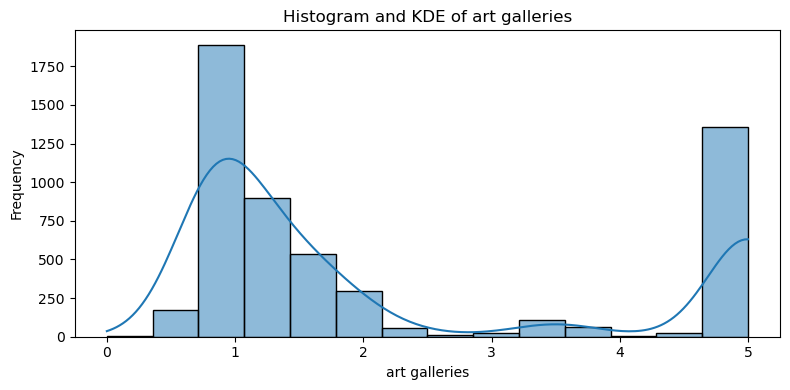

Inference for art galleries:
Skewness: 0.86 → The distribution is moderately right-skewed (positively skewed).

- Mean vs Median: 2.21 vs 1.33 → Skewed central tendency.
- IQR (Interquartile Range): 3.58
- Number of Outliers (1.5*IQR rule): 0


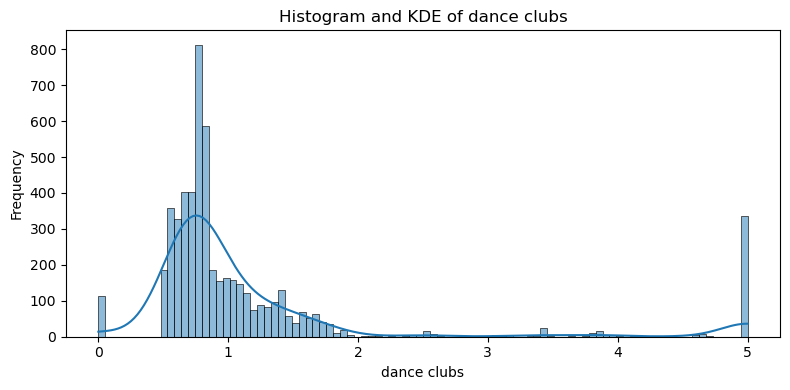

Inference for dance clubs:
Skewness: 2.69 → The distribution is highly right-skewed (positively skewed). Most values are concentrated on the left.

- Mean vs Median: 1.19 vs 0.80 → Skewed central tendency.
- IQR (Interquartile Range): 0.47
- Number of Outliers (1.5*IQR rule): 501


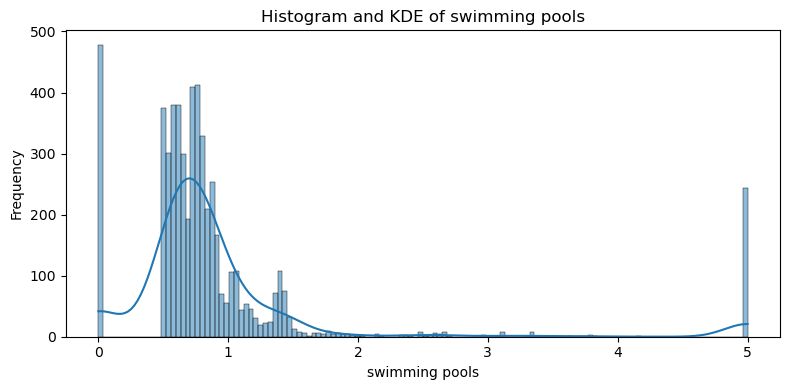

Inference for swimming pools:
Skewness: 3.27 → The distribution is highly right-skewed (positively skewed). Most values are concentrated on the left.

- Mean vs Median: 0.95 vs 0.74 → Skewed central tendency.
- IQR (Interquartile Range): 0.33
- Number of Outliers (1.5*IQR rule): 1027


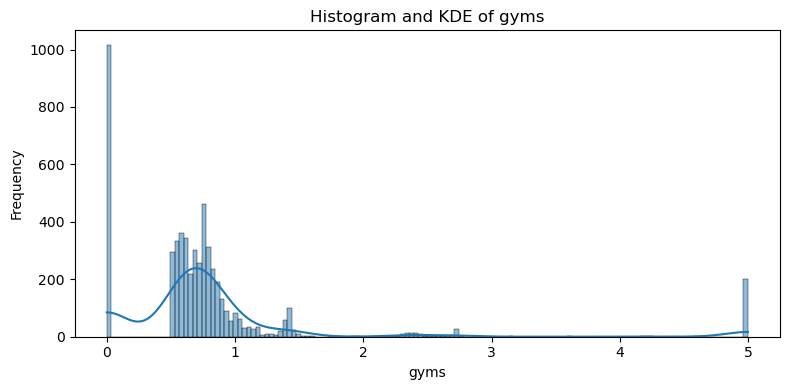

Inference for gyms:
Skewness: 3.28 → The distribution is highly right-skewed (positively skewed). Most values are concentrated on the left.

- Mean vs Median: 0.82 vs 0.69 → Skewed central tendency.
- IQR (Interquartile Range): 0.31
- Number of Outliers (1.5*IQR rule): 1572


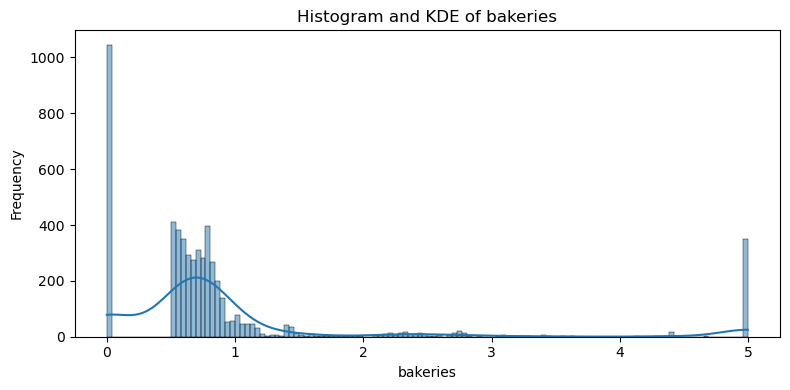

Inference for bakeries:
Skewness: 2.51 → The distribution is highly right-skewed (positively skewed). Most values are concentrated on the left.

- Mean vs Median: 0.97 vs 0.69 → Skewed central tendency.
- IQR (Interquartile Range): 0.34
- Number of Outliers (1.5*IQR rule): 1769


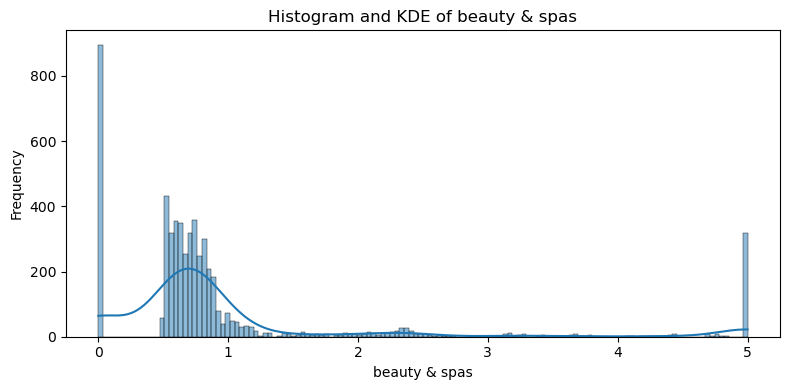

Inference for beauty & spas:
Skewness: 2.47 → The distribution is highly right-skewed (positively skewed). Most values are concentrated on the left.

- Mean vs Median: 1.00 vs 0.69 → Skewed central tendency.
- IQR (Interquartile Range): 0.32
- Number of Outliers (1.5*IQR rule): 1653


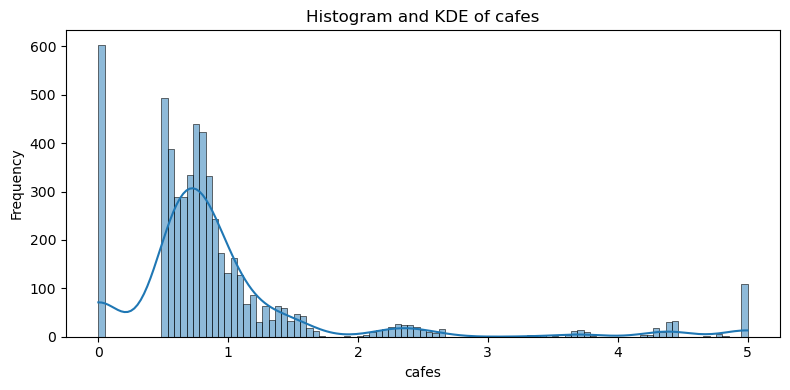

Inference for cafes:
Skewness: 2.82 → The distribution is highly right-skewed (positively skewed). Most values are concentrated on the left.

- Mean vs Median: 0.97 vs 0.76 → Skewed central tendency.
- IQR (Interquartile Range): 0.43
- Number of Outliers (1.5*IQR rule): 485


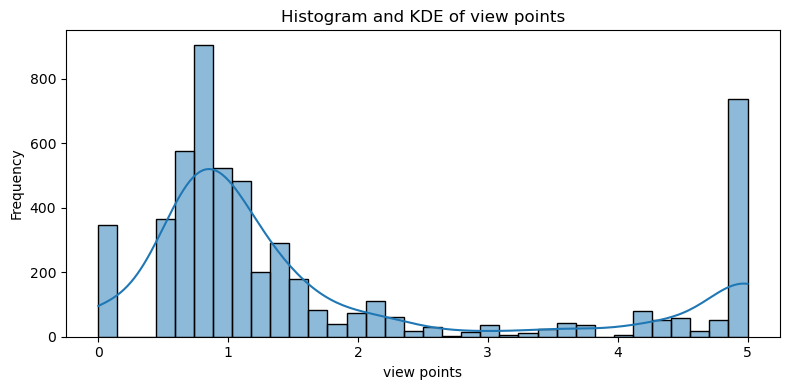

Inference for view points:
Skewness: 1.21 → The distribution is highly right-skewed (positively skewed). Most values are concentrated on the left.

- Mean vs Median: 1.75 vs 1.03 → Skewed central tendency.
- IQR (Interquartile Range): 1.33
- Number of Outliers (1.5*IQR rule): 997


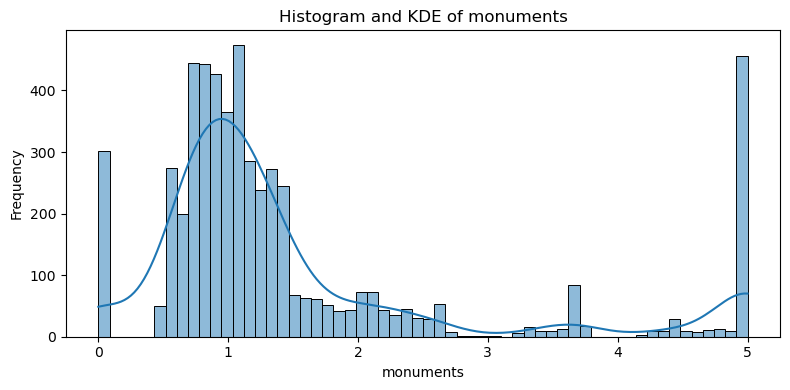

Inference for monuments:
Skewness: 1.71 → The distribution is highly right-skewed (positively skewed). Most values are concentrated on the left.

- Mean vs Median: 1.53 vs 1.07 → Skewed central tendency.
- IQR (Interquartile Range): 0.77
- Number of Outliers (1.5*IQR rule): 717


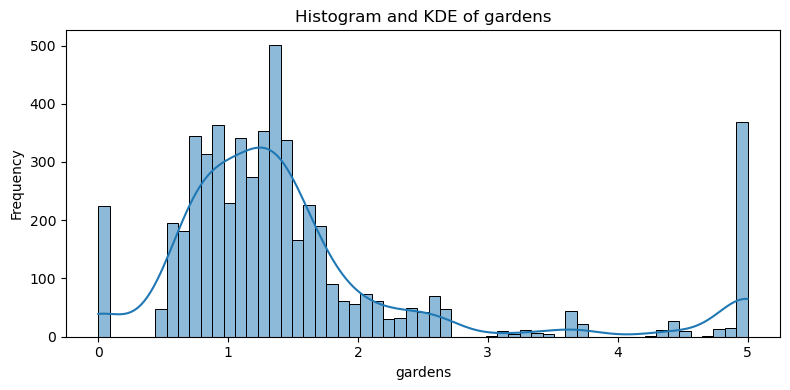

Inference for gardens:
Skewness: 1.87 → The distribution is highly right-skewed (positively skewed). Most values are concentrated on the left.

- Mean vs Median: 1.56 vs 1.29 → Skewed central tendency.
- IQR (Interquartile Range): 0.78
- Number of Outliers (1.5*IQR rule): 548


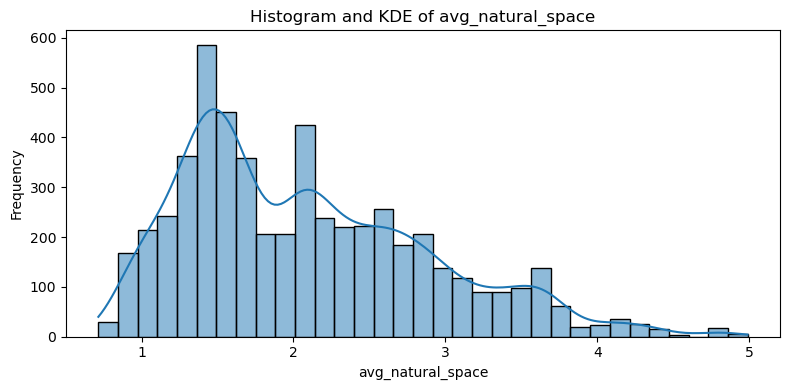

Inference for avg_natural_space:
Skewness: 0.76 → The distribution is moderately right-skewed (positively skewed).

- Mean vs Median: 2.08 vs 1.95 → Skewed central tendency.
- IQR (Interquartile Range): 1.17
- Number of Outliers (1.5*IQR rule): 36


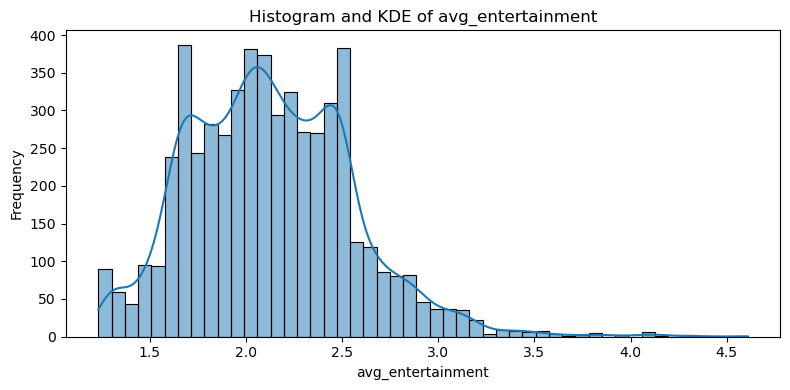

Inference for avg_entertainment:
Skewness: 0.60 → The distribution is moderately right-skewed (positively skewed).

- Mean vs Median: 2.13 vs 2.10 → Fairly symmetric central tendency.
- IQR (Interquartile Range): 0.61
- Number of Outliers (1.5*IQR rule): 47


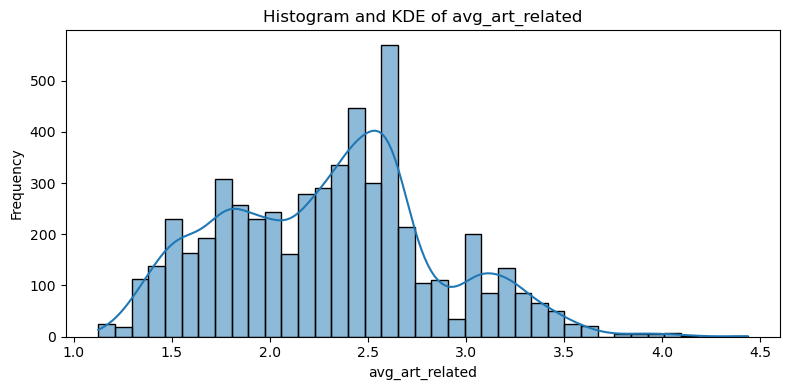

Inference for avg_art_related:
Skewness: 0.24 → The distribution is approximately symmetric.

- Mean vs Median: 2.30 vs 2.33 → Fairly symmetric central tendency.
- IQR (Interquartile Range): 0.76
- Number of Outliers (1.5*IQR rule): 27


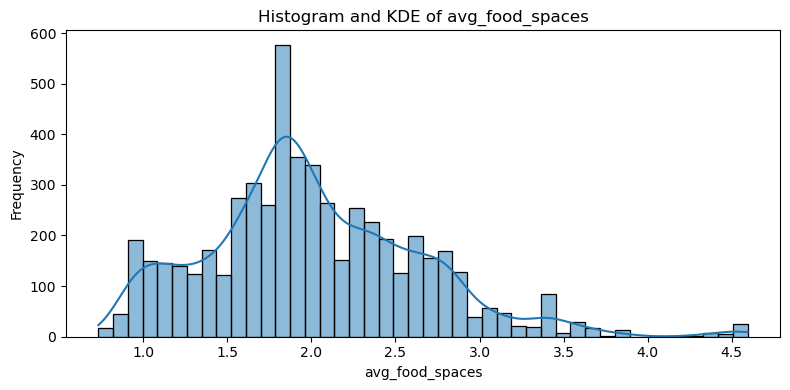

Inference for avg_food_spaces:
Skewness: 0.67 → The distribution is moderately right-skewed (positively skewed).

- Mean vs Median: 2.01 vs 1.92 → Skewed central tendency.
- IQR (Interquartile Range): 0.79
- Number of Outliers (1.5*IQR rule): 94


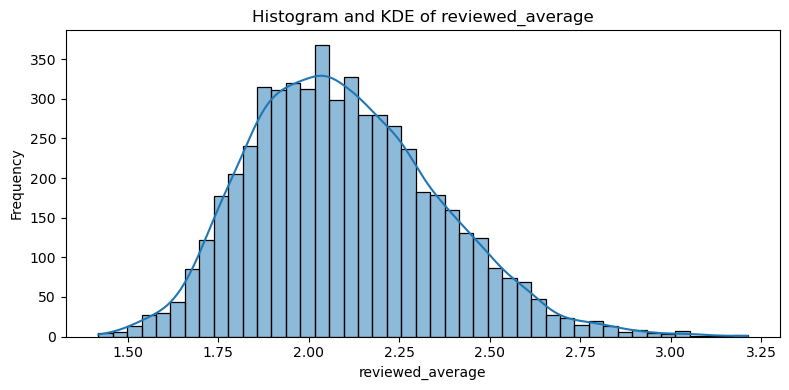

Inference for reviewed_average:
Skewness: 0.48 → The distribution is approximately symmetric.

- Mean vs Median: 2.10 vs 2.08 → Fairly symmetric central tendency.
- IQR (Interquartile Range): 0.35
- Number of Outliers (1.5*IQR rule): 55


In [119]:

print(f""" Output Timestamp: {datetime.now()} \n""")

# Plot Histogram and KDE with interpretation
for col in df_user_travel_reviews.select_dtypes(include=['float64', 'int64']).columns:
    data = df_user_travel_reviews[col].dropna()
    
    plt.figure(figsize=(8, 4))
    sns.histplot(data, kde=True)
    plt.title(f'Histogram and KDE of {col}')
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.tight_layout()
    plt.show()
    
    # Inference based on skewness
    sk = skew(data)
    mean = data.mean()
    median = data.median()
    std = data.std()
    iqr = data.quantile(0.75) - data.quantile(0.25)
    outliers = data[(data < data.quantile(0.25) - 1.5 * iqr) | (data > data.quantile(0.75) + 1.5 * iqr)]

    if sk > 1:
        interpretation = "The distribution is highly right-skewed (positively skewed). Most values are concentrated on the left."
    elif sk > 0.5:
        interpretation = "The distribution is moderately right-skewed (positively skewed)."
    elif sk < -1:
        interpretation = "The distribution is highly left-skewed (negatively skewed). Most values are concentrated on the right."
    elif sk < -0.5:
        interpretation = "The distribution is moderately left-skewed (negatively skewed)."
    else:
        interpretation = "The distribution is approximately symmetric."
    
    print(f"Inference for {col}:\nSkewness: {sk:.2f} → {interpretation}\n")
    print(f"- Mean vs Median: {mean:.2f} vs {median:.2f} →", end=" ")
    if abs(mean - median) < 0.1 * std:
        print("Fairly symmetric central tendency.")
    else:
        print("Skewed central tendency.")
    print(f"- IQR (Interquartile Range): {iqr:.2f}")
    print(f"- Number of Outliers (1.5*IQR rule): {len(outliers)}")


##### Distribution Check - Normal, Gamma, Beta,

In [103]:
print(f""" Output Timestamp: {datetime.now()} \n""")
# === Define distributions to check ===
distributions = ['norm', 'gamma', 'beta']

# === Function to fit distributions and compute KS test ===
def analyze_distribution(series, dists):
    results = []
    data = series.dropna().values
    if len(data) < 10:
        return None  # Skip small samples
    for dist_name in dists:
        dist = getattr(stats, dist_name)
        try:
            params = dist.fit(data)
            D, p = stats.kstest(data, dist_name, args=params)
            results.append((dist_name, D, p))
        except Exception as e:
            continue  # Skip if fitting fails
    return sorted(results, key=lambda x: x[2], reverse=True)  # sort by p-value desc

# === Analyze all numeric columns ===
def analyze_dataframe_distributions(df, dists):
    numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
    summary = {}
    for col in numeric_cols:
        print(f"\nAnalyzing column: {col}")
        results = analyze_distribution(df[col], dists)
        if results:
            summary[col] = results
            for dist, D, p in results:
                print(f"  {dist:>8} | KS Stat = {D:.4f} | p = {p:.4f}")
        else:
            print("  Not enough data or fitting failed.")
    return summary

# === Run the analysis ===
distribution_summary = analyze_dataframe_distributions(df_user_travel_reviews, distributions)



 Output Timestamp: 2025-06-19 07:38:46.772883 


Analyzing column: age
      beta | KS Stat = 0.0345 | p = 0.0000
     gamma | KS Stat = 0.0638 | p = 0.0000
      norm | KS Stat = 0.0645 | p = 0.0000

Analyzing column: churches
      beta | KS Stat = 0.0828 | p = 0.0000
     gamma | KS Stat = 0.0839 | p = 0.0000
      norm | KS Stat = 0.1358 | p = 0.0000

Analyzing column: resorts
     gamma | KS Stat = 0.1158 | p = 0.0000
      norm | KS Stat = 0.1530 | p = 0.0000
      beta | KS Stat = 0.3731 | p = 0.0000

Analyzing column: beaches
     gamma | KS Stat = 0.1165 | p = 0.0000
      norm | KS Stat = 0.1787 | p = 0.0000
      beta | KS Stat = 0.3150 | p = 0.0000

Analyzing column: parks
     gamma | KS Stat = 0.1291 | p = 0.0000
      norm | KS Stat = 0.1670 | p = 0.0000
      beta | KS Stat = 0.4697 | p = 0.0000

Analyzing column: theatres
     gamma | KS Stat = 0.1318 | p = 0.0000
      norm | KS Stat = 0.1624 | p = 0.0000
      beta | KS Stat = 0.3259 | p = 0.0000

Analyzing column: m

In [104]:
print(f""" Output Timestamp: {datetime.now()} \n""")
display(df_user_travel_reviews.head())

 Output Timestamp: 2025-06-19 07:38:53.753784 



,userid,age,gender,country,churches,resorts,beaches,parks,theatres,museums,...,beauty & spas,cafes,view points,monuments,gardens,age_group,avg_natural_space,avg_entertainment,avg_art_related,avg_food_spaces
0,User 1,52,Male,IN,0.0,0.0,3.63,3.65,5.0,2.92,...,0.0,0.0,0.0,0.0,0.0,Adult,3.64,2.540000,2.12,1.56
1,User 2,66,Female,US,0.0,0.0,3.63,3.65,5.0,2.92,...,0.0,0.0,0.0,0.0,0.0,Senior,3.64,2.582857,2.12,1.56
2,User 3,46,Female,UK,0.0,0.0,3.63,3.63,5.0,2.92,...,0.0,0.0,0.0,0.0,0.0,Adult,3.63,2.581429,2.12,1.56
3,User 4,70,Female,UK,0.0,0.5,3.63,3.63,5.0,2.92,...,0.0,0.0,0.0,0.0,0.0,Senior,3.63,2.285000,2.13,1.56
4,User 5,28,Male,UK,0.0,0.0,3.63,3.63,5.0,2.92,...,0.0,0.0,0.0,0.0,0.0,Adult,3.63,2.581429,2.12,1.56


#### 6. Check if there is a relation between Gender and user Rating for Churches

##### Null Hypothesis (H0): There is no relationship between Gender and user rating for Churches.
##### Alternate Hypothesis (H1): There is a relationship between Gender and user rating for Churches.

In [105]:
from scipy.stats import ttest_ind
from scipy.stats import f_oneway

print(f""" Output Timestamp: {datetime.now()} \n""")

# We will perform a t-test to check if there is a significant relationship between Gender and user rating for Churches.
# Extract relevant columns for the t-test

church_ratings_by_gender = df_user_travel_reviews[['gender', 'churches']].dropna()

# Independent t-test
male_group = church_ratings_by_gender[church_ratings_by_gender['gender'] == 'Male']['churches']
female_group = church_ratings_by_gender[church_ratings_by_gender['gender'] == 'Female']['churches']
stat, p_value = ttest_ind(male_group, female_group, equal_var=False)
print(f"T-test statistic: {stat:.4f}, p-value: {p_value:.4e}")

if p_value < 0.05:
    print("Reject the null hypothesis: There is a significant relationship between Gender and user rating for Churches.")
else:
    print("Fail to reject the null hypothesis: No significant relationship between Gender and user rating for Churches.")

 Output Timestamp: 2025-06-19 07:39:00.234829 

T-test statistic: -0.4595, p-value: 6.4591e-01
Fail to reject the null hypothesis: No significant relationship between Gender and user rating for Churches.


In [106]:
print(f""" Output Timestamp: {datetime.now()} \n""")
display(df_user_travel_reviews.head())

 Output Timestamp: 2025-06-19 07:39:09.375851 



,userid,age,gender,country,churches,resorts,beaches,parks,theatres,museums,...,beauty & spas,cafes,view points,monuments,gardens,age_group,avg_natural_space,avg_entertainment,avg_art_related,avg_food_spaces
0,User 1,52,Male,IN,0.0,0.0,3.63,3.65,5.0,2.92,...,0.0,0.0,0.0,0.0,0.0,Adult,3.64,2.540000,2.12,1.56
1,User 2,66,Female,US,0.0,0.0,3.63,3.65,5.0,2.92,...,0.0,0.0,0.0,0.0,0.0,Senior,3.64,2.582857,2.12,1.56
2,User 3,46,Female,UK,0.0,0.0,3.63,3.63,5.0,2.92,...,0.0,0.0,0.0,0.0,0.0,Adult,3.63,2.581429,2.12,1.56
3,User 4,70,Female,UK,0.0,0.5,3.63,3.63,5.0,2.92,...,0.0,0.0,0.0,0.0,0.0,Senior,3.63,2.285000,2.13,1.56
4,User 5,28,Male,UK,0.0,0.0,3.63,3.63,5.0,2.92,...,0.0,0.0,0.0,0.0,0.0,Adult,3.63,2.581429,2.12,1.56


#### 7. Determine if the User is overall reviewing only during Positive Experiance or Negative Experiance

##### Adding Column to get the average for all the review ratings from Non-Zero or Valid Values

In [107]:
print(f""" Output Timestamp: {datetime.now()} \n""")
# Select only the review rating columns (exclude non-rating columns)
rating_cols = [
    'churches', 'resorts', 'beaches', 'parks', 'theatres', 'museums', 'malls', 'zoos',
    'restaurants', 'pubs/bars', 'burger/pizza shops', 'hotels/other lodgings', 'juice bars',
    'art galleries', 'dance clubs', 'swimming pools', 'gyms', 'bakeries', 'beauty & spas',
    'cafes', 'view points', 'monuments', 'gardens'
]

def avg_nonzero(row):
    vals = row[rating_cols]
    vals = pd.to_numeric(vals, errors='coerce')
    vals = vals[(vals != 0) & (~vals.isnull())]
    return vals.mean() if not vals.empty else np.nan

df_user_travel_reviews['reviewed_average'] = df_user_travel_reviews.apply(avg_nonzero, axis=1)
display(df_user_travel_reviews[['userid', 'reviewed_average']].head())

 Output Timestamp: 2025-06-19 07:39:14.798696 



,userid,reviewed_average
0,User 1,2.397333
1,User 2,2.417333
2,User 3,2.415333
3,User 4,2.277500
4,User 5,2.415333


##### Calculate Mean, Median and Standard Deviation along with Additional Statistics

In [108]:
print(f""" Output Timestamp: {datetime.now()} \n""")
# Calculate mean, median, and standard deviation for 'reviewed_average'
mean_reviewed = df_user_travel_reviews['reviewed_average'].mean()
median_reviewed = df_user_travel_reviews['reviewed_average'].median()
std_reviewed = df_user_travel_reviews['reviewed_average'].std()


# Additional statistics
min_reviewed = df_user_travel_reviews['reviewed_average'].min()
max_reviewed = df_user_travel_reviews['reviewed_average'].max()
q1 = df_user_travel_reviews['reviewed_average'].quantile(0.25)
q3 = df_user_travel_reviews['reviewed_average'].quantile(0.75)


 Output Timestamp: 2025-06-19 07:39:20.365802 



##### Inference from the Statistics are as below

In [109]:
print(f""" Output Timestamp: {datetime.now()} \n""")
# Inference from the reviewed_average statistics

print("Inference on User Review Behavior:")
print(f"- The mean of reviewed_average is {mean_reviewed:.2f}, with a median of {median_reviewed:.2f} and a standard deviation of {std_reviewed:.2f}.")
print(f"- The minimum reviewed_average is {min_reviewed:.2f}, and the maximum is {max_reviewed:.2f}.")
print(f"- The 25th percentile (Q1) is {q1:.2f}, and the 75th percentile (Q3) is {q3:.2f}.")

if mean_reviewed > (max_reviewed + min_reviewed) / 2:
    print("- On average, users tend to give more positive reviews.")
elif mean_reviewed < (max_reviewed + min_reviewed) / 2:
    print("- On average, users tend to give more negative reviews.")
else:
    print("- On average, user reviews are balanced between positive and negative.")

print("- The relatively small standard deviation suggests that most users' average ratings are close to the mean, indicating consistent review behavior across users.")

 Output Timestamp: 2025-06-19 07:39:25.245995 

Inference on User Review Behavior:
- The mean of reviewed_average is 2.10, with a median of 2.08 and a standard deviation of 0.26.
- The minimum reviewed_average is 1.42, and the maximum is 3.21.
- The 25th percentile (Q1) is 1.91, and the 75th percentile (Q3) is 2.26.
- On average, users tend to give more negative reviews.
- The relatively small standard deviation suggests that most users' average ratings are close to the mean, indicating consistent review behavior across users.


#### 7. Check the Influence of Age Group on Average Reviews by Natura Space, Entertainment, Art Related and Food Spaces

##### We are going to Perform ANOVA Test and not t-test since we have 3 Age Groups and t-test is applicable for 2 groups.

In [116]:
import pandas as pd
from scipy.stats import f_oneway

print(f""" Output Timestamp: {datetime.now()} \n""")

# Columns to review for Significance Testing
review_cols = [
    'avg_natural_space',
    'avg_entertainment',
    'avg_art_related',
    'avg_food_spaces'
]

# Drop rows with NaNs in relevant columns
df_user_travel_reviews_clean = df_user_travel_reviews.dropna(subset=['age_group'] + review_cols)

# Group by age_group
grouped = df_user_travel_reviews_clean.groupby('age_group')

# Perform ANOVA for each column
anova_results = {}
for col in review_cols:
    # Extract list of values per age group
    groups = [group[col].dropna().values for name, group in grouped if len(group[col].dropna()) > 1]
    if len(groups) > 1:
        f_stat, p_val = f_oneway(*groups)
        anova_results[col] = {'F-statistic': f_stat, 'p-value': p_val}
    else:
        anova_results[col] = {'F-statistic': None, 'p-value': None}

# Print results
for col, result in anova_results.items():
    if result['p-value'] <= 0.05:
        print(f""" for column '{col}': Age Group has a significant effect on reviews since p-value: {result['p-value']:.2f} is less than 0.05""")
    else:
        print(f""" for column '{col}': Age Group does not has a significant effect on reviews since p-value: {result['p-value']:.2f} is greater than 0.05""")



 Output Timestamp: 2025-06-19 07:53:34.283792 

 for column 'avg_natural_space': Age Group does not has a significant effect on reviews since p-value: 0.27 is greater than 0.05
 for column 'avg_entertainment': Age Group does not has a significant effect on reviews since p-value: 0.90 is greater than 0.05
 for column 'avg_art_related': Age Group does not has a significant effect on reviews since p-value: 0.91 is greater than 0.05
 for column 'avg_food_spaces': Age Group does not has a significant effect on reviews since p-value: 0.50 is greater than 0.05


#### 8. Calculate Confidence Interval for each user with 95% Confidence

In [128]:
print(f""" Output Timestamp: {datetime.now()} \n""")

# 95% confidence
z = norm.ppf(0.975)

def compute_ci(row):
    values = row[review_cols].dropna()
    values = values[values > 0]  # exclude zero if needed
    n = len(values)
    if n <= 1:
        return pd.Series([np.nan, np.nan])
    
    mean = values.mean()
    std = values.std()
    se = std / np.sqrt(n)
    
    lower = mean - z * se
    upper = mean + z * se
    return pd.Series([lower, upper])

df_user_travel_reviews[['reviewed_ci_lower', 'reviewed_ci_upper']] = df_user_travel_reviews.apply(compute_ci, axis=1)

display(df_user_travel_reviews[['userid', 'reviewed_average', 'reviewed_ci_lower', 'reviewed_ci_upper']].head())
# Save the final DataFrame to a CSV file


 Output Timestamp: 2025-06-19 08:15:31.542591 



,userid,reviewed_average,reviewed_ci_lower,reviewed_ci_upper
0,User 1,2.397333,1.602412,3.327588
1,User 2,2.417333,1.611679,3.339750
2,User 3,2.415333,1.613190,3.332524
3,User 4,2.277500,1.542321,3.260179
4,User 5,2.415333,1.613190,3.332524


#### 9. Identify top 5 Users who are tend to give high reviews based on Confidence Interval

##### We are going to use CI Upper Bound and then target Top 20 Users to send email for Giving Reviews when any location needs to be given review

In [131]:
print(f""" Output Timestamp: {datetime.now()} \n""")

# Sort users by the lower bound of their confidence interval in descending order
top_reviewers = df_user_travel_reviews.sort_values(by='reviewed_ci_upper', ascending=False)

# Pick top 5 users
top_20_users = top_reviewers.head(20)

# Display selected columns
print(top_20_users[['userid', 'reviewed_average', 'reviewed_ci_lower', 'reviewed_ci_upper']])


 Output Timestamp: 2025-06-19 08:21:31.740900 

         userid  reviewed_average  reviewed_ci_lower  reviewed_ci_upper
960    User 961          2.399565           1.007291           4.384959
1865  User 1867          2.400870           1.038591           4.321409
951    User 952          2.714348           1.528104           4.261396
4606  User 4609          2.378261           1.099549           4.247201
516    User 517          2.240000           1.046944           4.218556
607    User 608          3.212222           1.779521           4.193145
953    User 954          2.412609           1.032372           4.184128
2848  User 2851          2.213043           0.640418           4.157582
661    User 662          2.973125           1.558561           4.156856
2832  User 2835          2.497826           1.363002           4.149748
1556  User 1558          2.363000           1.156398           4.136519
512    User 513          2.305217           1.113897           4.132603
1872  User 1874 

##### **Observation from Above:**

Users with Wide Variability including lower near 1 but high upper bound impacts our Target User who we want to determine that is likely going to give positive review is not accurate. 

So we should consider CI Midscore to focus on High CI Lower & High CI Upper.

In [132]:
# Create a midpoint score for the confidence interval
df_user_travel_reviews['ci_score'] = (df_user_travel_reviews['reviewed_ci_lower'] + df_user_travel_reviews['reviewed_ci_upper']) / 2

# Sort by this score in descending order
top_20_balanced = df_user_travel_reviews.sort_values(by='ci_score', ascending=False).head(20)

# Display relevant columns
display(top_20_balanced[['userid', 'reviewed_average', 'reviewed_ci_lower', 'reviewed_ci_upper', 'ci_score']])


,userid,reviewed_average,reviewed_ci_lower,reviewed_ci_upper,ci_score
642,User 643,3.136471,2.022619,4.045089,3.033854
1343,User 1344,2.949444,2.533656,3.457713,2.995685
607,User 608,3.212222,1.779521,4.193145,2.986333
1362,User 1364,2.803333,2.711124,3.186585,2.948854
5443,User 5446,2.824348,2.291179,3.591571,2.941375
3923,User 3926,2.852174,2.412730,3.468770,2.940750
623,User 624,3.047647,2.049616,3.826467,2.938042
626,User 627,2.691176,1.905228,3.955355,2.930292
2088,User 2090,2.777391,1.946408,3.890092,2.918250
628,User 629,2.687222,1.815902,3.997979,2.906940
